# IFS - Data Science - Alex Paulo
### KNN
### Dataset from https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

### O que é o KNN (K-Nearest Neighbor)?


![KNN](./knn.png "KNN")

Me diga com quem tu andas... eu direi quem tu és!!!


# Exercício

### 1) Crie uma aplicação que faça uso da base gratuita disponível em https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

### 2) Faça o pré-processamento dos dados removendo todas as abstinências (votos não realizados pelos deputados). 

### 3) Crie um gráfico exibindo a diferença de intenção de votos, entre republicanos e democratas, referente a investimentos direcionados para crianças deficientes.

### 4) Faça a codificação da classificação representando democratas com 0 (zero) e republicanos com 1 (um). Sugestão: utilize a API LabelEncoder, do pacote sklearn.preprocessing.

### 5) Utilize a API train_test_split, do pacote sklearn.model_selection, para determinar que 80% dos dados resultantes do pré-processamento serão utilizados para treinamento, e 20% para testes.

### 6) Treine o modelo utilizando a API KNeighborsClassifier do pacote sklearn.neighbors.

### 7) Faça predições considerando os dados separados para teste pela API train_test_split.

### 8) Mensure a acurácia alcançada.


### EDA (Exploratory Data Analyse)

In [16]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Cross Validation
from sklearn.model_selection import train_test_split

# manipulating data via DataFrames, 2-D tabular, column-oriented data structure
import pandas as pd

# Assign the csv data to a DataFrame
# data = pd.read_csv("./data.csv")
data = pd.read_csv("./data.csv")


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class                                   435 non-null    object 
 1   handicapped-infants                     423 non-null    float64
 2   water-project-cost-sharing              387 non-null    float64
 3   adoption-of-the-budget-resolution       424 non-null    float64
 4   physician-fee-freeze                    424 non-null    float64
 5   el-salvador-aid                         420 non-null    float64
 6   religious-groups-in-schools             424 non-null    float64
 7   anti-satellite-test-ban                 421 non-null    float64
 8   aid-to-nicaraguan-contras               420 non-null    float64
 9   mx-missile                              413 non-null    float64
 10  immigration                             428 non-null    float6

In [18]:
data_without_nulls = data.dropna()

In [19]:
data.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
data_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class                                   232 non-null    object 
 1   handicapped-infants                     232 non-null    float64
 2   water-project-cost-sharing              232 non-null    float64
 3   adoption-of-the-budget-resolution       232 non-null    float64
 4   physician-fee-freeze                    232 non-null    float64
 5   el-salvador-aid                         232 non-null    float64
 6   religious-groups-in-schools             232 non-null    float64
 7   anti-satellite-test-ban                 232 non-null    float64
 8   aid-to-nicaraguan-contras               232 non-null    float64
 9   mx-missile                              232 non-null    float64
 10  immigration                             232 non-null    float6

In [21]:
# Print the first 10 instances
data.head(10)

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [22]:
data_without_nulls.head(10)

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
27,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
29,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


### Working only with not null values

In [23]:
data = data_without_nulls

### Understanding Republicans x Democrats

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

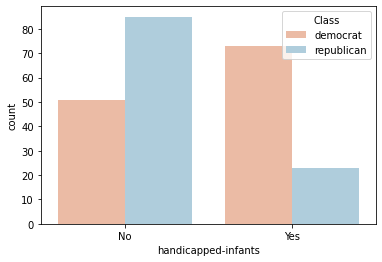

In [24]:
import seaborn as sns


ax = sns.countplot(x='handicapped-infants', hue='Class', data=data_without_nulls, palette='RdBu')
ax.set_xticklabels(['No', 'Yes'])


### Enconding Categorical Label

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical values with LabelEncoder
labelencoder = LabelEncoder()
data["Class"] = labelencoder.fit_transform(data["Class"])

data.head(5)

,Class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [26]:
class_ = pd.DataFrame({'Class': ['Democrat', 'Republican']})
class_

,Class
0,Democrat
1,Republican


### Splitting the dataset into the Training set and Test set

In [27]:
X = data[ 
         [ 'handicapped-infants', 
           'water-project-cost-sharing',
           'adoption-of-the-budget-resolution',
           'physician-fee-freeze',
           'el-salvador-aid',
           'religious-groups-in-schools',
           'anti-satellite-test-ban',
           'aid-to-nicaraguan-contras',
           'mx-missile',
           'immigration',
           'synfuels-corporation-cutback',
           'education-spending',
           'superfund-right-to-sue',
           'crime',
           'duty-free-exports',
           'export-administration-act-south-africa'
         ]
        ]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

### Create a k-NN classifier with 6 neighbors. Fiting

In [28]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Predicting

In [29]:
predict_results = knn.predict(X_test)
print("Prediction: {}".format(predict_results))
# print(predict_results)


Prediction: [0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 0 0 1 0 0]


### Accuracy

In [30]:
knn.score(X_test, y_test)

0.9361702127659575